In [51]:
import re 
from string import punctuation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt
import codecs
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [4]:
with codecs.open('ratings_test.txt', encoding = 'utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    m = data[0]
    data = data[1:]
data

[['6270596', '굳 ㅋ', '1'],
 ['9274899', 'GDNTOPCLASSINTHECLUB', '0'],
 ['8544678', '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', '0'],
 ['6825595', '지루하지는 않은데 완전 막장임... 돈주고 보기에는....', '0'],
 ['6723715', '3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??', '0'],
 ['7898805', '음악이 주가 된, 최고의 음악영화', '1'],
 ['6315043', '진정한 쓰레기', '0'],
 ['6097171', '마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다', '0'],
 ['8932678',
  '갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다',
  '0'],
 ['6242223', '이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..', '1'],
 ['7462111', '괜찮네요오랜만포켓몬스터잼밌어요', '1'],
 ['8425305', '한국독립영화의 한계 그렇게 아버지가 된다와 비교됨', '0'],
 ['6900881',
  '청춘은 아름답다 그 아름다움은 이성을 흔들어 놓는다. 찰나의 아름다움을 잘 포착한 섬세하고 아름다운 수채화같은 퀴어영화이다.',
  '1'],
 ['9629375', '눈에 보이는 반전이었지만 영화의 흡인력은 사라지지 않았다.', '1'],
 ['9037756',
  '"""스토리, 연출, 연기, 비주얼 등 영화의 기본 조차 안된 영화에 무슨 평을 해. 이런 영화 찍고도 김문옥 감독은 """"내가 영화 경력이 몇OO인데 조무래기들이 내 영화를 평론해?"""" 같은 마인드에 빠져있겠지?"""',
  '0'],
 ['10268521', '소위 ㅈ문가라는 평점은 뭐냐?', '1'],
 ['2

In [5]:
t_df = pd.DataFrame(data, columns = m)
t_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [6]:
t_df = t_df.drop(labels = 'id', axis = 1)
t_df

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [7]:
t_df = t_df.drop_duplicates(subset = ['document'])
t_df

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [9]:
t_df['document'] = t_df.document.str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
t_df['document'] = t_df.document.str.replace('^ +', '')
t_df['document'] = t_df.document.replace('', np.nan)
t_df = t_df.dropna(how = 'any', axis = 0)
t_df

C:\Users\김철용\AppData\Local\Temp/ipykernel_2504/2789477356.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t_df['document'] = t_df.document.str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
C:\Users\김철용\AppData\Local\Temp/ipykernel_2504/2789477356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['document'] = t_df.document.str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
C:\Users\김철용\AppData\Local\Temp/ipykernel_2504/2789477356.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  t_df['document'] = t_df.document.str.replace('^ +', '')
C:\Users\김철용\AppData\Local\Temp/ipykernel_2504/2789477356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,document,label
0,굳 ㅋ,1
2,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,음악이 주가 된 최고의 음악영화,1
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [10]:
stop_w = ['은', '는', '이', '가', '을', '를', '도', '에', '고', '나', '우리', '으로', '로', '에게', '또', '것', 
          '영화', '정말', '진짜', '너무']
p_ck = list(punctuation)
stop_w = stop_w + p_ck
stop_w

['은',
 '는',
 '이',
 '가',
 '을',
 '를',
 '도',
 '에',
 '고',
 '나',
 '우리',
 '으로',
 '로',
 '에게',
 '또',
 '것',
 '영화',
 '정말',
 '진짜',
 '너무',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [13]:
otk = Okt()
tk_l = []
for sentence in t_df['document']:
    tk_l.append(otk.morphs(sentence))
tk_l

[['굳', 'ㅋ'],
 ['뭐',
  '야',
  '이',
  '평점',
  '들',
  '은',
  '나쁘진',
  '않지만',
  '점',
  '짜',
  '리',
  '는',
  '더',
  '더욱',
  '아니잖아'],
 ['지루하지는', '않은데', '완전', '막장', '임', '돈', '주고', '보기', '에는'],
 ['만',
  '아니었어도',
  '별',
  '다섯',
  '개',
  '줬을텐데',
  '왜',
  '로',
  '나와서',
  '제',
  '심기',
  '를',
  '불편하게',
  '하죠'],
 ['음악', '이', '주가', '된', '최고', '의', '음악', '영화'],
 ['진정한', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나온듯',
  '한',
  '창의력',
  '없는',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '를',
  '젖게',
  '한다'],
 ['갈수록',
  '개판',
  '되가는',
  '중국영화',
  '유치하고',
  '내용',
  '없음',
  '폼',
  '잡다',
  '끝남',
  '말',
  '도',
  '안되는',
  '무기',
  '에',
  '유치한',
  '남무',
  '아',
  '그립다',
  '동사서독',
  '같은',
  '영화',
  '가',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별',
  '의',
  '아픔',
  '뒤',
  '에',
  '찾아오는',
  '새로운',
  '인연',
  '의',
  '기쁨',
  '모든',
  '사람',
  '이',
  '그렇지는',
  '않네'],
 ['괜찮네요', '오랜', '만', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '의', '한계', '그렇게', '아버지', '가', '된다와', '비교', '됨'],
 ['청춘',
  '은',
  '아름답다',
  '그',
  '아름다',
  '움',


In [14]:
s_tk_l = []
for t_s in tk_l:
    s_tk_l.append([word for word in t_s if word not in stop_w])
s_tk_l

[['굳', 'ㅋ'],
 ['뭐', '야', '평점', '들', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아'],
 ['지루하지는', '않은데', '완전', '막장', '임', '돈', '주고', '보기', '에는'],
 ['만', '아니었어도', '별', '다섯', '개', '줬을텐데', '왜', '나와서', '제', '심기', '불편하게', '하죠'],
 ['음악', '주가', '된', '최고', '의', '음악'],
 ['진정한', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나온듯',
  '한',
  '창의력',
  '없는',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '젖게',
  '한다'],
 ['갈수록',
  '개판',
  '되가는',
  '중국영화',
  '유치하고',
  '내용',
  '없음',
  '폼',
  '잡다',
  '끝남',
  '말',
  '안되는',
  '무기',
  '유치한',
  '남무',
  '아',
  '그립다',
  '동사서독',
  '같은',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별',
  '의',
  '아픔',
  '뒤',
  '찾아오는',
  '새로운',
  '인연',
  '의',
  '기쁨',
  '모든',
  '사람',
  '그렇지는',
  '않네'],
 ['괜찮네요', '오랜', '만', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '의', '한계', '그렇게', '아버지', '된다와', '비교', '됨'],
 ['청춘',
  '아름답다',
  '그',
  '아름다',
  '움',
  '이성',
  '흔들어',
  '놓는다',
  '찰나',
  '의',
  '아름다',
  '움',
  '잘',
  '포착',
  '한',
  '섬세하고',
  '아름다운',
  '수채화',
  '같은',
  '퀴어',
  '이다'],
 ['눈', '보이는', '반전',

In [24]:
t_l = []
for sentence in s_tk_l:
    t_l.append([' '.join(sentence)])
t_l

[['굳 ㅋ'],
 ['뭐 야 평점 들 나쁘진 않지만 점 짜 리 더 더욱 아니잖아'],
 ['지루하지는 않은데 완전 막장 임 돈 주고 보기 에는'],
 ['만 아니었어도 별 다섯 개 줬을텐데 왜 나와서 제 심기 불편하게 하죠'],
 ['음악 주가 된 최고 의 음악'],
 ['진정한 쓰레기'],
 ['마치 미국 애니 에서 튀어나온듯 한 창의력 없는 로봇 디자인 부터가 고개 젖게 한다'],
 ['갈수록 개판 되가는 중국영화 유치하고 내용 없음 폼 잡다 끝남 말 안되는 무기 유치한 남무 아 그립다 동사서독 같은 이건 류 아 류작 이다'],
 ['이별 의 아픔 뒤 찾아오는 새로운 인연 의 기쁨 모든 사람 그렇지는 않네'],
 ['괜찮네요 오랜 만 포켓몬스터 잼밌 어 요'],
 ['한국 독립영화 의 한계 그렇게 아버지 된다와 비교 됨'],
 ['청춘 아름답다 그 아름다 움 이성 흔들어 놓는다 찰나 의 아름다 움 잘 포착 한 섬세하고 아름다운 수채화 같은 퀴어 이다'],
 ['눈 보이는 반전 이었지만 의 흡인 력 사라지지 않았다'],
 ['스토리 연출 연기 비주 얼 등 의 기본 조차 안된 무슨 평 해 이런 찍고도 김문옥 감독 내 경력 몇 인데 조무래기 들 내 평론 해 같은 마인드 빠져있겠지'],
 ['소위 ㅈ 문 가라 평점 뭐 냐'],
 ['최고'],
 ['발연기 도저히 못 보겠다 이렇게 연기 못 할거라곤 상상 못 했네'],
 ['나이스'],
 ['별 재미 없는거 우려 먹어 챔프 에서 방송 몇번 했더라 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'],
 ['일 의 금요일 나이트메어 시리즈 와 함께 가장 많은 시리즈 양산 해냈던 헬레 저 시리즈 의 첫 편 작가 의 상상력 돋보이는 작품 이며 갈고리 사지 찢는 고어씬 지금 보더 라도 상당히 잔인하고 충격 적 이다'],
 ['나름 교훈 돋기는 하지만 어쩔 수없이 저 평점 받을수밖에 없는 저 질 섹스 코미디'],
 ['꽤 재밌게 본 였다'],
 ['민주화 시대 의 억눌린 영혼 의 관음 적 인 욕구 분출 인상 적 이다'],
 ['일본 천황 미국 으로부터

In [26]:
tk = Tokenizer()
tk.fit_on_texts(s_tk_l)
tk.word_index

{'의': 1,
 '들': 2,
 '한': 3,
 '다': 4,
 '만': 5,
 '적': 6,
 '점': 7,
 '에서': 8,
 '평점': 9,
 '연기': 10,
 '과': 11,
 '내': 12,
 '최고': 13,
 '그': 14,
 '인': 15,
 '잘': 16,
 '안': 17,
 '와': 18,
 '생각': 19,
 '이런': 20,
 '게': 21,
 '못': 22,
 '왜': 23,
 '스토리': 24,
 '이다': 25,
 '드라마': 26,
 '사람': 27,
 '감동': 28,
 '하는': 29,
 '보고': 30,
 '때': 31,
 '더': 32,
 '하고': 33,
 '말': 34,
 '감독': 35,
 '배우': 36,
 'ㅋㅋ': 37,
 '아': 38,
 '그냥': 39,
 '내용': 40,
 '거': 41,
 '까지': 42,
 '중': 43,
 '재미': 44,
 '보다': 45,
 '본': 46,
 '시간': 47,
 '요': 48,
 '없는': 49,
 '좀': 50,
 '뭐': 51,
 '수': 52,
 '지': 53,
 '네': 54,
 '봤는데': 55,
 '쓰레기': 56,
 '사랑': 57,
 '볼': 58,
 '작품': 59,
 '다시': 60,
 '하나': 61,
 '없다': 62,
 '할': 63,
 '마지막': 64,
 'ㅠㅠ': 65,
 '이건': 66,
 '저': 67,
 '같은': 68,
 '정도': 69,
 '있는': 70,
 '좋은': 71,
 '완전': 72,
 '처음': 73,
 'ㅋ': 74,
 '장면': 75,
 '주인공': 76,
 'ㅋㅋㅋ': 77,
 '이렇게': 78,
 '입니다': 79,
 '액션': 80,
 '하': 81,
 '최악': 82,
 '걸': 83,
 '보는': 84,
 '이야기': 85,
 '지금': 86,
 '끝': 87,
 'ㅡㅡ': 88,
 '연출': 89,
 '없고': 90,
 '임': 91,
 '개': 92,
 '참': 93,
 '돈': 94,
 '서': 

In [29]:
ck_data1 = list(tk.word_counts.items())
ck_data2 = sorted(ck_data1, key = lambda x: x[1])
ck_data3 = [d for d in ck_data2 if d[1] > 4]
len(ck_data3)

10413

In [30]:
tk = Tokenizer(num_words = 10413)
tk.fit_on_texts(s_tk_l)
len(tk.word_index)

54250

In [31]:
s_tk = tk.texts_to_sequences(s_tk_l)
s_tk

[[628, 74],
 [51, 143, 9, 2, 4664, 1549, 7, 940, 736, 32, 829, 2336],
 [2736, 72, 345, 91, 94, 400, 126, 204],
 [5, 7853, 112, 1935, 92, 23, 582, 148, 5401, 7018],
 [187, 3730, 128, 13, 1, 187],
 [715, 56],
 [1098, 363, 267, 8, 3, 49, 1936, 3266, 2467, 4402, 157],
 [422,
  1238,
  2398,
  1024,
  40,
  252,
  3267,
  2816,
  34,
  416,
  2648,
  1257,
  38,
  2549,
  68,
  66,
  381,
  38,
  2737,
  25],
 [3133, 1, 1764, 415, 901, 3134, 1, 7019, 185, 27, 4155],
 [2337, 301, 5, 354, 48],
 [164, 1085, 1, 1421, 365, 635, 516, 570],
 [1125,
  1187,
  14,
  1688,
  261,
  4665,
  1,
  1688,
  261,
  16,
  3,
  5402,
  311,
  7854,
  68,
  6386,
  25],
 [217, 1188, 150, 4403, 1, 8877, 323, 1158],
 [24,
  89,
  10,
  1550,
  1258,
  395,
  1,
  1551,
  861,
  5403,
  131,
  756,
  161,
  20,
  35,
  12,
  5848,
  321,
  102,
  2,
  12,
  6387,
  161,
  68,
  3268],
 [2399, 1113, 3568, 9, 51, 173],
 [13],
 [614, 1065, 22, 1889, 78, 10, 22, 716, 22, 2031],
 [],
 [112, 44, 4156, 1617, 7855, 8, 5

In [32]:
np.unique(s_tk)

C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


array([list([]), list([1]), list([1, 1, 10]), ...,
       list([10410, 286, 4997, 8]), list([10410, 4633, 1, 5749]),
       list([10412, 10412, 10412, 10412, 10412, 825])], dtype=object)

In [33]:
idx = [i for i, n in enumerate(s_tk) if len(n) < 1]
idx

[17,
 172,
 220,
 297,
 395,
 542,
 997,
 1569,
 1590,
 1597,
 2023,
 2236,
 2280,
 2305,
 2373,
 2584,
 2860,
 2942,
 3101,
 3213,
 3297,
 3354,
 3396,
 3482,
 3545,
 3576,
 3730,
 3788,
 3814,
 4192,
 4951,
 5207,
 5241,
 5672,
 5729,
 5814,
 5884,
 6150,
 6532,
 6619,
 6667,
 6850,
 6856,
 6992,
 7060,
 7070,
 7181,
 7724,
 7760,
 7927,
 7938,
 7981,
 8211,
 8323,
 8393,
 8553,
 8784,
 8841,
 8932,
 8966,
 8988,
 9314,
 9367,
 9437,
 9791,
 9901,
 10309,
 10381,
 10502,
 10928,
 10981,
 11039,
 11225,
 11263,
 11361,
 11417,
 11487,
 11969,
 11981,
 12609,
 12669,
 12846,
 12907,
 12927,
 12981,
 13023,
 13034,
 13143,
 13449,
 13539,
 13698,
 13880,
 13918,
 13935,
 13945,
 14097,
 14111,
 14153,
 14253,
 14477,
 14683,
 14708,
 14868,
 15056,
 15340,
 15375,
 15706,
 15729,
 15738,
 15850,
 16504,
 16569,
 16877,
 16954,
 16965,
 17070,
 17085,
 17306,
 17332,
 17465,
 17560,
 17586,
 17601,
 17703,
 17730,
 17805,
 17814,
 17853,
 17924,
 18059,
 18302,
 18734,
 18918,
 19035,
 1

In [34]:
X_data = s_tk
Y_data = np.array(t_df['label'])

In [36]:
X_data = np.delete(X_data, idx, axis = 0)
Y_data = np.delete(Y_data, idx, axis = 0)

C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [45]:
len(X_data), len(Y_data)

(48493, 48493)

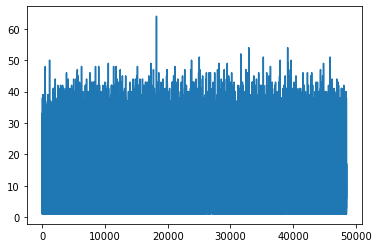

In [43]:
ck_l = [len(i) for i in X_data]
plt.plot(ck_l)

In [44]:
p_x_data = pad_sequences(X_data, maxlen = 35)
p_x_data

array([[   0,    0,    0, ...,    0,  628,   74],
       [   0,    0,    0, ...,   32,  829, 2336],
       [   0,    0,    0, ...,  400,  126,  204],
       ...,
       [   0,    0,    0, ...,   84,  251, 1383],
       [   0,    0,    0, ...,    8,    4,   54],
       [   0,    0,    0, ...,  795,   23,  915]])

In [55]:
Y_data = Y_data.astype(int)

In [56]:
t_x, tt_x, t_y, tt_y = train_test_split(p_x_data, Y_data, random_state = 22)
t_x.shape, t_y.shape, tt_x.shape, tt_y.shape

((36369, 35), (36369,), (12124, 35), (12124,))

In [57]:
batch_size = 128
total_word_num = 10413
max_sentence_len = 35
embedding_len = 100
neuron_num = 64
d_out = 0.5
lr = 0.001
ec = 4

In [58]:
m1 = Sequential()
m1.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_len))
m1.add(SimpleRNN(neuron_num, dropout = d_out, return_sequences = True))
m1.add(SimpleRNN(neuron_num, dropout = d_out))
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])
hy1 = m1.fit(t_x, t_y, epochs = ec, validation_data = (tt_x, tt_y), validation_freq = 2)

Epoch 1/4
1137/1137 [==============================] - 34s 28ms/step - loss: 0.5159 - acc: 0.7263 2s - loss: 0.5 - ETA: 1s - 
Epoch 2/4
1137/1137 [==============================] - 33s 29ms/step - loss: 0.3723 - acc: 0.8373 - val_loss: 0.4115 - val_acc: 0.8129
Epoch 3/4
1137/1137 [==============================] - 30s 26ms/step - loss: 0.3056 - acc: 0.8735
Epoch 4/4
1137/1137 [==============================] - 30s 27ms/step - loss: 0.2672 - acc: 0.8918 - val_loss: 0.4671 - val_acc: 0.8000


In [59]:
m2 = Sequential()
m2.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_len))
m2.add(LSTM(neuron_num, dropout = d_out, return_sequences = True))
m2.add(LSTM(neuron_num, dropout = d_out))
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])
hy2 = m2.fit(t_x, t_y, epochs = ec, validation_data = (tt_x, tt_y), validation_freq = 2)

Epoch 1/4
1137/1137 [==============================] - 57s 46ms/step - loss: 0.4540 - acc: 0.7793 0s - loss: 0.4545 - acc: 
Epoch 2/4
1137/1137 [==============================] - 61s 54ms/step - loss: 0.3297 - acc: 0.8576 - val_loss: 0.3794 - val_acc: 0.8262
Epoch 3/4
1137/1137 [==============================] - 57s 50ms/step - loss: 0.2841 - acc: 0.8803
Epoch 4/4
1137/1137 [==============================] - 59s 52ms/step - loss: 0.2468 - acc: 0.8968 - val_loss: 0.4428 - val_acc: 0.8220


In [60]:
m3 = Sequential()
m3.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_len))
m3.add(layers.GRU(neuron_num, dropout = d_out, return_sequences = True))
m3.add(layers.GRU(neuron_num, dropout = d_out))
m3.add(Dense(1, activation = 'sigmoid'))
m3.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])
hy3 = m3.fit(t_x, t_y, epochs = ec, validation_data = (tt_x, tt_y), validation_freq = 2)

Epoch 1/4
1137/1137 [==============================] - 56s 44ms/step - loss: 0.4518 - acc: 0.7804
Epoch 2/4
1137/1137 [==============================] - 56s 49ms/step - loss: 0.3267 - acc: 0.8599 - val_loss: 0.3766 - val_acc: 0.8327
Epoch 3/4
1137/1137 [==============================] - 56s 49ms/step - loss: 0.2742 - acc: 0.8859
Epoch 4/4
1137/1137 [==============================] - 56s 49ms/step - loss: 0.2384 - acc: 0.9040 - val_loss: 0.4368 - val_acc: 0.8221


In [61]:
m4 = Sequential()
m4.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_len))
m4.add(Bidirectional(LSTM(neuron_num)))
m4.add(Dropout(0.5))
m4.add(Dense(1, activation = 'sigmoid'))
m4.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])
hy4 = m4.fit(t_x, t_y, epochs = ec, validation_data = (tt_x, tt_y), validation_freq = 2)

Epoch 1/4
1137/1137 [==============================] - 51s 42ms/step - loss: 0.4509 - acc: 0.7838
Epoch 2/4
1137/1137 [==============================] - 50s 44ms/step - loss: 0.3153 - acc: 0.8657 - val_loss: 0.3912 - val_acc: 0.8245
Epoch 3/4
1137/1137 [==============================] - 46s 40ms/step - loss: 0.2547 - acc: 0.8930
Epoch 4/4
1137/1137 [==============================] - 49s 44ms/step - loss: 0.2022 - acc: 0.9142 - val_loss: 0.5265 - val_acc: 0.8143


In [65]:
t_s = '개성있는 남자들의 향연. 인생이 이토록 재밌고 의미있을 수 있을까? 보다 큰 꿈을 향해 이 영화는 전진해나간다.'

In [80]:
tk_t_s = otk.morphs(t_s)
rtk_t_s = []
for i in tk_t_s:
    if i not in stop_w:
        rtk_t_s.append(i)
rtk_t_s

['개성',
 '있는',
 '남자',
 '들',
 '의',
 '향연',
 '인생',
 '토록',
 '재밌고',
 '의미',
 '있을',
 '수',
 '있을까',
 '보다',
 '큰',
 '꿈',
 '향',
 '해',
 '전진',
 '해나',
 '간다']

In [94]:
t_d = tk.texts_to_sequences(rtk_t_s)
t_d = sum(t_d, [])
t_d

[1584,
 70,
 163,
 2,
 1,
 2834,
 127,
 2674,
 597,
 299,
 1073,
 52,
 887,
 45,
 441,
 590,
 2136,
 161,
 688]

In [95]:
x = 0
while True:
    if x == 35:
        break
    t_d.insert(0, 0)
    x = len(t_d)
t_d = [t_d]
t_d

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1584,
  70,
  163,
  2,
  1,
  2834,
  127,
  2674,
  597,
  299,
  1073,
  52,
  887,
  45,
  441,
  590,
  2136,
  161,
  688]]

In [98]:
m1.predict(t_d)

array([[0.92930603]], dtype=float32)

In [99]:
m2.predict(t_d)

array([[0.99624723]], dtype=float32)

In [100]:
m3.predict(t_d)

array([[0.9935937]], dtype=float32)

In [101]:
m4.predict(t_d)

array([[0.9972793]], dtype=float32)